In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\vimalson\Downloads\student_data.csv')

In [3]:
df.head()

,admit,gre,gpa,rank
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [4]:
df.tail()

,admit,gre,gpa,rank
395,0,620.0,4.00,2.0
396,0,560.0,3.04,3.0
397,0,460.0,2.63,2.0
398,0,700.0,3.65,2.0
399,0,600.0,3.89,3.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit    400 non-null int64
gre      398 non-null float64
gpa      398 non-null float64
rank     399 non-null float64
dtypes: float64(3), int64(1)
memory usage: 12.6 KB


In [6]:
df.describe()

,admit,gre,gpa,rank
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


In [7]:
df.fillna(0,inplace=True)

DATA VISUALIZATION

Text(0.5, 0, 'GPA')

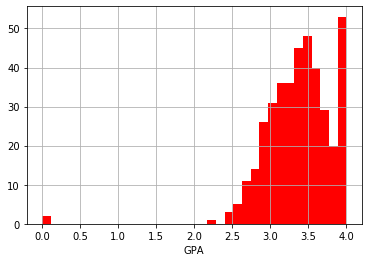

In [8]:
df['gpa'].hist(bins=35,color='red')
plt.xlabel('GPA')

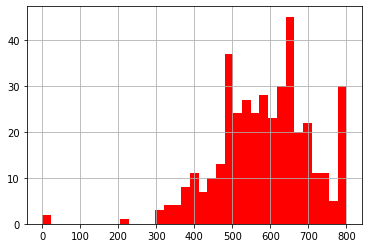

In [9]:
df['gre'].hist(bins=35,color='red')

In [10]:
## to find correlation we use joint-plot

In [11]:
from scipy import stats

c:\users\vimalson\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


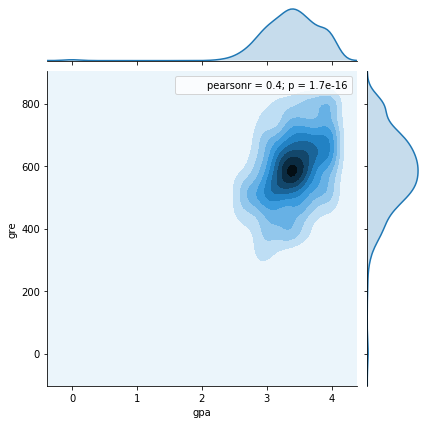

In [12]:
plot=sns.jointplot(x='gpa',y='gre',data=df,kind='kde')
plot.annotate(stats.pearsonr)

In [13]:
##create dummy variables for rank column

In [14]:
dummy_ranks = pd.get_dummies(df['rank'],prefix='rank')

In [15]:
dummy_ranks.head()

,rank_0.0,rank_1.0,rank_2.0,rank_3.0,rank_4.0
0,0,0,0,1,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,0,0,0,1
4,0,0,0,0,1


In [16]:
columns = ['admit','gre','gpa']

In [17]:
df = df[columns].join(dummy_ranks.loc[:,'rank_2.0':])

In [18]:
df.head()

,admit,gre,gpa,rank_2.0,rank_3.0,rank_4.0
0,0,380.0,3.61,0,1,0
1,1,660.0,3.67,0,1,0
2,1,800.0,4.00,0,0,0
3,1,640.0,3.19,0,0,1
4,0,520.0,2.93,0,0,1


TO BUILD A LOGISTIC REGRESSION MODEL

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [20]:
X = df[['gre','gpa','rank_2.0','rank_3.0','rank_4.0']]

In [21]:
y = df['admit']

In [22]:
X.shape

(400, 5)

In [23]:
y.shape

(400,)

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=25)

In [39]:
X_train.shape

(280, 5)

In [40]:
y_train.shape

(280,)

In [41]:
model=LogisticRegression()

In [42]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
 model.fit(X_train,y_train)

c:\users\vimalson\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
prediction = model.predict(X_test)

In [49]:
from sklearn.metrics import classification_report

In [50]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.73      0.94      0.82        83
           1       0.62      0.22      0.32        37

    accuracy                           0.72       120
   macro avg       0.67      0.58      0.57       120
weighted avg       0.69      0.72      0.67       120

